In [1]:
import pandas as pd

# Load the raw dataset provided
file_path = "/content/raw_dataset_week_4.csv"
df_raw = pd.read_csv(file_path)

# Display basic information about the dataset
df_raw.info(), df_raw.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                494 non-null    object 
 1   Customer_ID         500 non-null    int64  
 2   Age                 500 non-null    int64  
 3   Gender              500 non-null    object 
 4   Income              450 non-null    float64
 5   Spending_Score      500 non-null    int64  
 6   Credit_Score        450 non-null    float64
 7   Loan_Amount         450 non-null    float64
 8   Previous_Defaults   500 non-null    int64  
 9   Marketing_Spend     500 non-null    int64  
 10  Purchase_Frequency  500 non-null    int64  
 11  Seasonality         500 non-null    object 
 12  Sales               500 non-null    int64  
 13  Customer_Churn      500 non-null    int64  
 14  Defaulted           500 non-null    int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 58.7+ KB

(None,
        Date  Customer_ID  Age  Gender    Income  Spending_Score  Credit_Score  \
 0  12-04-24            1   56  Female  142418.0               7         391.0   
 1  21-02-24            2   69    Male   63088.0              82         652.0   
 2  02-04-24            3   46    Male  136868.0              91         662.0   
 3  15-01-24            4   32  Female       NaN              34         644.0   
 4  16-04-24            5   60    Male   59811.0              91         469.0   
 
    Loan_Amount  Previous_Defaults  Marketing_Spend  Purchase_Frequency  \
 0       8083.0                  1            15376                   3   
 1      34328.0                  2             6889                   6   
 2      47891.0                  2             6054                  29   
 3      25103.0                  2             4868                   8   
 4      44891.0                  1            17585                  12   
 
   Seasonality  Sales  Customer_Churn  Defaulte

In [2]:
import numpy as np

# Copy the raw data for cleaning
df = df_raw.copy()

# Step 1: Handle missing values using column-wise appropriate methods
df['Date'].fillna(method='ffill', inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].median(), inplace=True)
df['Loan_Amount'].fillna(df['Loan_Amount'].median(), inplace=True)

# Step 2: Handle outliers using IQR method for numeric columns
numeric_cols = ['Age', 'Income', 'Spending_Score', 'Credit_Score', 'Loan_Amount',
                'Marketing_Spend', 'Purchase_Frequency', 'Sales']

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
df_cleaned = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Save the cleaned dataset
cleaned_csv_path = "/content/cleaned_dataset_week_4.csv"
df_cleaned.to_csv(cleaned_csv_path, index=False)

df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Customer_ID         500 non-null    int64  
 2   Age                 500 non-null    int64  
 3   Gender              500 non-null    object 
 4   Income              500 non-null    float64
 5   Spending_Score      500 non-null    int64  
 6   Credit_Score        500 non-null    float64
 7   Loan_Amount         500 non-null    float64
 8   Previous_Defaults   500 non-null    int64  
 9   Marketing_Spend     500 non-null    int64  
 10  Purchase_Frequency  500 non-null    int64  
 11  Seasonality         500 non-null    object 
 12  Sales               500 non-null    int64  
 13  Customer_Churn      500 non-null    int64  
 14  Defaulted           500 non-null    int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 58.7+ KB

<ipython-input-2-a62ba3fad03d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(method='ffill', inplace=True)
<ipython-input-2-a62ba3fad03d>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'].fillna(method='ffill', inplace=True)
<ipython-input-2-a62ba3fad03d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will chang

(None,
        Date  Customer_ID  Age  Gender    Income  Spending_Score  Credit_Score  \
 0  12-04-24            1   56  Female  142418.0               7         391.0   
 1  21-02-24            2   69    Male   63088.0              82         652.0   
 2  02-04-24            3   46    Male  136868.0              91         662.0   
 3  15-01-24            4   32  Female   85375.5              34         644.0   
 4  16-04-24            5   60    Male   59811.0              91         469.0   
 
    Loan_Amount  Previous_Defaults  Marketing_Spend  Purchase_Frequency  \
 0       8083.0                  1            15376                   3   
 1      34328.0                  2             6889                   6   
 2      47891.0                  2             6054                  29   
 3      25103.0                  2             4868                   8   
 4      44891.0                  1            17585                  12   
 
   Seasonality  Sales  Customer_Churn  Defaulte

Saving cleaned_dataset_week_4.csv to cleaned_dataset_week_4 (1).csv


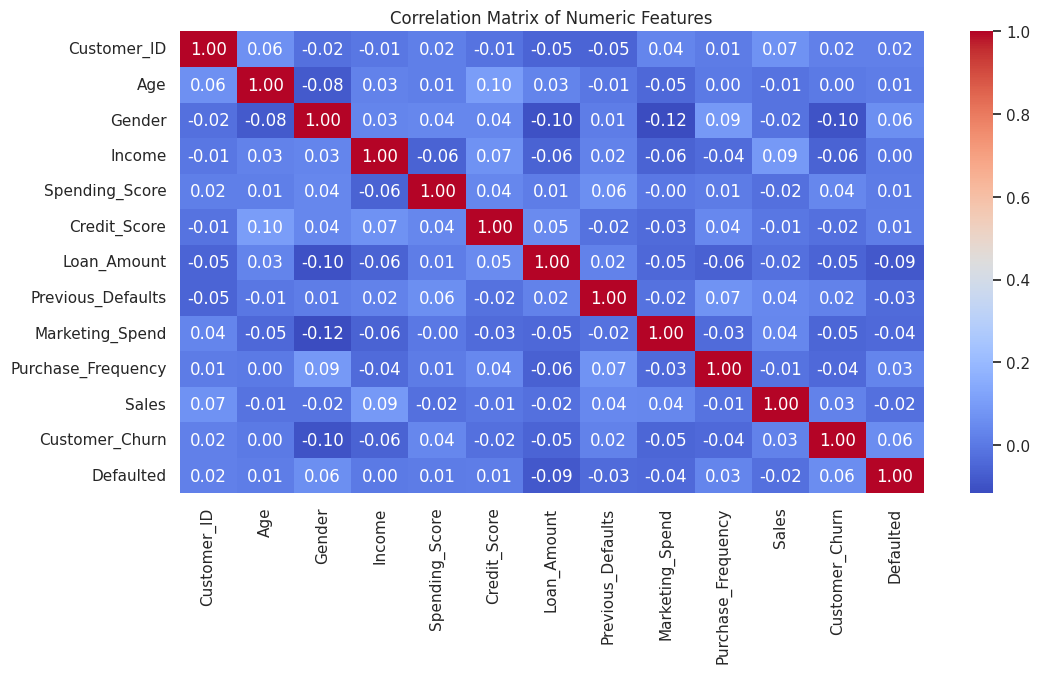

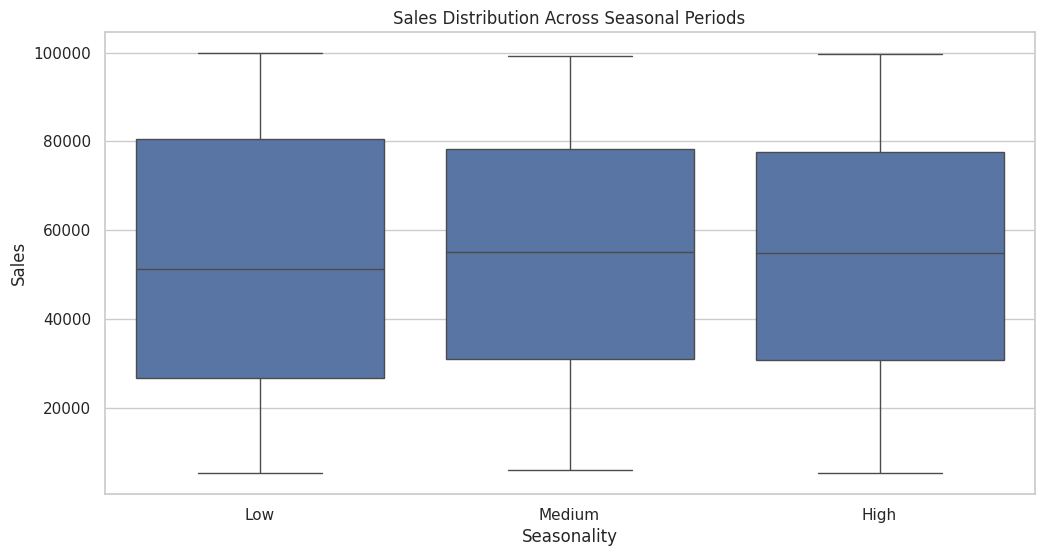

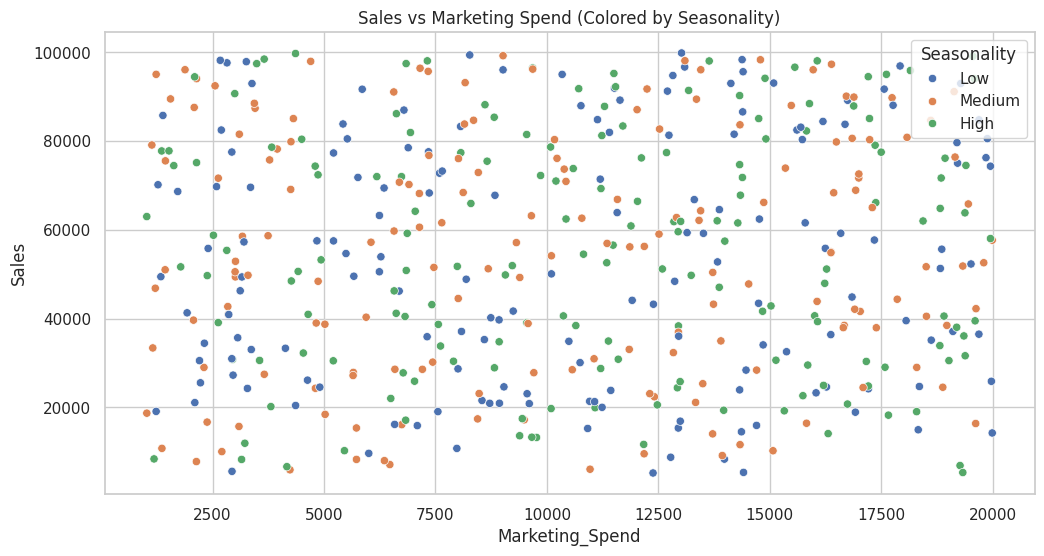

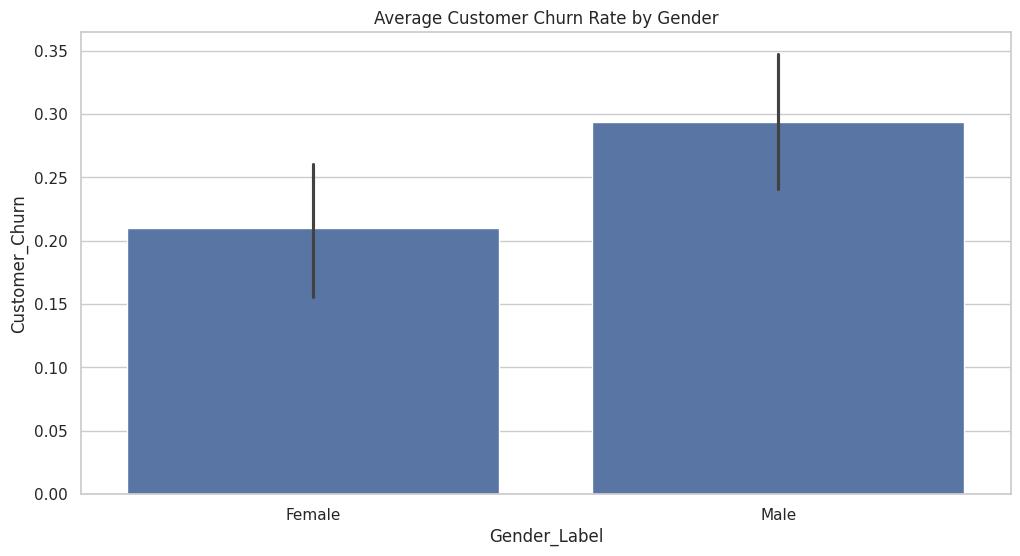

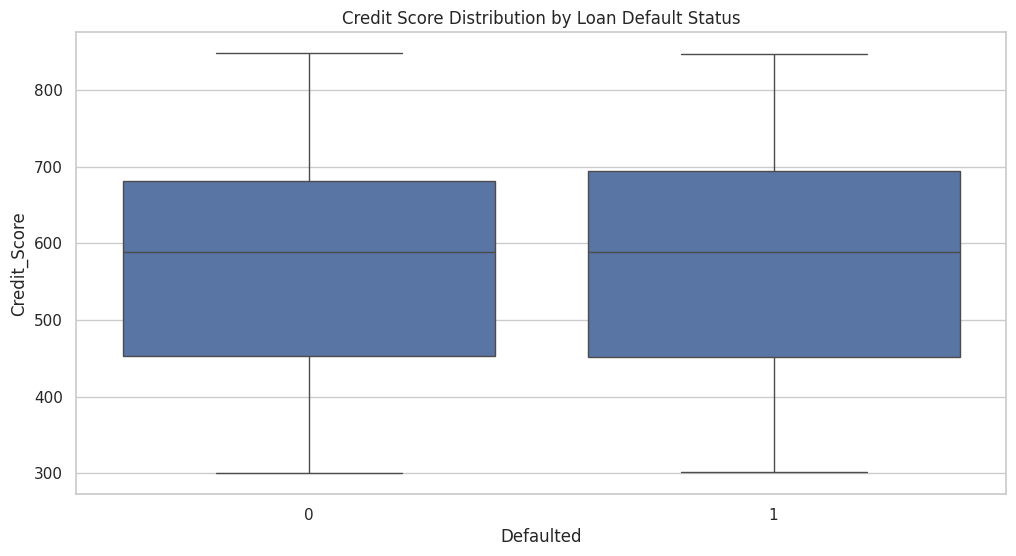

In [4]:
# --- SETUP ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("cleaned_dataset_week_4.csv")

# Basic prep
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Gender_Label'] = df['Gender'].map({0: 'Male', 1: 'Female'})
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 75], labels=["18–30", "31–45", "46–60", "61–75"])

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# --- PLOT 1: Correlation Matrix ---
plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# --- PLOT 2: Sales by Seasonality ---
plt.figure()
sns.boxplot(x='Seasonality', y='Sales', data=df)
plt.title("Sales Distribution Across Seasonal Periods")
plt.show()

# --- PLOT 3: Marketing Spend vs Sales ---
plt.figure()
sns.scatterplot(x='Marketing_Spend', y='Sales', hue='Seasonality', data=df)
plt.title("Sales vs Marketing Spend (Colored by Seasonality)")
plt.show()

# --- PLOT 4: Churn Rate by Gender ---
plt.figure()
sns.barplot(x='Gender_Label', y='Customer_Churn', data=df)
plt.title("Average Customer Churn Rate by Gender")
plt.show()

# --- PLOT 5: Credit Score vs Defaulted ---
plt.figure()
sns.boxplot(x='Defaulted', y='Credit_Score', data=df)
plt.title("Credit Score Distribution by Loan Default Status")
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Load the cleaned data
df = pd.read_csv("cleaned_dataset_week_4.csv")

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['Seasonality'], drop_first=True)

# Drop unnecessary columns
df.drop(columns=['Date', 'Customer_ID'], inplace=True)

# Feature scaling
scaler = StandardScaler()
features = df.drop(columns=['Sales', 'Customer_Churn', 'Defaulted'])
scaled_features = scaler.fit_transform(features)
X = pd.DataFrame(scaled_features, columns=features.columns)

# Prepare targets
y_sales = df['Sales']
y_churn = df['Customer_Churn']
y_default = df['Defaulted']

# --- MODEL 1: Sales Prediction (Regression) ---
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_sales, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train_s, y_train_s)
sales_preds = reg_model.predict(X_test_s)
sales_mse = mean_squared_error(y_test_s, sales_preds)

# --- MODEL 2: Customer Churn (Classification) ---
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_churn, test_size=0.2, random_state=42)
clf_churn = LogisticRegression(max_iter=200)
clf_churn.fit(X_train_c, y_train_c)
churn_preds = clf_churn.predict(X_test_c)
churn_report = classification_report(y_test_c, churn_preds)
churn_accuracy = accuracy_score(y_test_c, churn_preds)

# --- MODEL 3: Default Risk (Random Forest) ---
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y_default, test_size=0.2, random_state=42)
clf_default = RandomForestClassifier(n_estimators=100, random_state=42)
clf_default.fit(X_train_d, y_train_d)
default_preds = clf_default.predict(X_test_d)
default_report = classification_report(y_test_d, default_preds)
default_accuracy = accuracy_score(y_test_d, default_preds)
default_importance = pd.Series(clf_default.feature_importances_, index=X.columns).sort_values(ascending=False)

# --- Results ---
print("Sales Prediction MSE:", round(sales_mse, 2))
print("\nCustomer Churn Classification Report:\n", churn_report)
print("Customer Churn Accuracy:", round(churn_accuracy, 3))
print("\nLoan Default Classification Report:\n", default_report)
print("Loan Default Accuracy:", round(default_accuracy, 3))
print("\nTop 5 Features Affecting Loan Default:\n", default_importance.head(5))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sales Prediction MSE: 853416932.36

Customer Churn Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        71
           1       0.00      0.00      0.00        29

    accuracy                           0.71       100
   macro avg       0.35      0.50      0.42       100
weighted avg       0.50      0.71      0.59       100

Customer Churn Accuracy: 0.71

Loan Default Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        82
           1       0.00      0.00      0.00        18

    accuracy                           0.82       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.67      0.82      0.74       100

Loan Default Accuracy: 0.82

Top 5 Features Affecting Loan Default:
 Loan_Amount        0.141876
Marketing_Spend    0.140399
Income             0.140180
Credit_Score       0.133843
Age                0.1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# 📦 Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 📥 Load cleaned dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("cleaned_dataset_week_4.csv")

# 🧹 Basic encoding
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['Seasonality'], drop_first=True)

# 🧽 Drop irrelevant columns (non-numeric identifiers)
df.drop(columns=['Date', 'Customer_ID'], inplace=True)

# 🔍 Separate features and targets
X = df.drop(columns=['Sales', 'Customer_Churn', 'Defaulted'])  # features
y_sales = df['Sales']
y_churn = df['Customer_Churn']
y_default = df['Defaulted']

# ⚖️ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Create scaled feature DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 📤 Preview
print("Feature matrix shape:", X_scaled_df.shape)
X_scaled_df.head()


Saving cleaned_dataset_week_4.csv to cleaned_dataset_week_4 (2).csv
Feature matrix shape: (500, 11)


,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality_Low,Seasonality_Medium
0,0.784233,1.049209,1.523769,-1.507494,-1.232524,-1.740560,0.031499,0.875546,-1.458630,1.437875,-0.714545
1,1.649686,-0.953099,-0.563178,1.070183,0.516545,0.486702,1.242998,-0.666786,-1.104307,1.437875,-0.714545
2,0.118500,-0.953099,1.377764,1.379504,0.583559,1.637715,1.242998,-0.818529,1.612170,-0.695471,1.399493
3,-0.813526,1.049209,0.023142,-0.579531,0.462934,-0.296171,1.242998,-1.034060,-0.868092,-0.695471,1.399493
4,1.050527,-0.953099,-0.649387,1.379504,-0.709814,1.383123,0.031499,1.276984,-0.395661,-0.695471,-0.714545


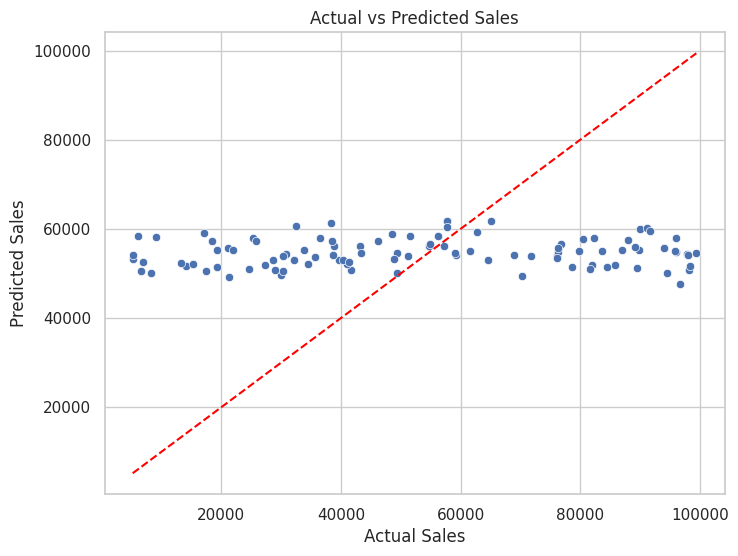

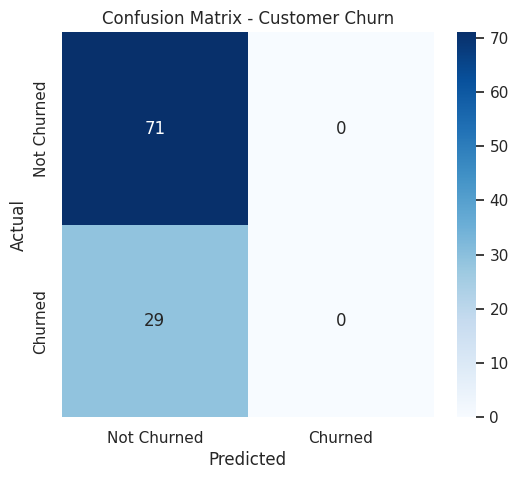

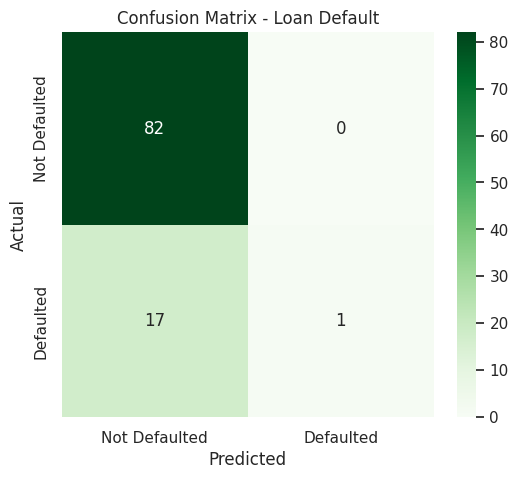

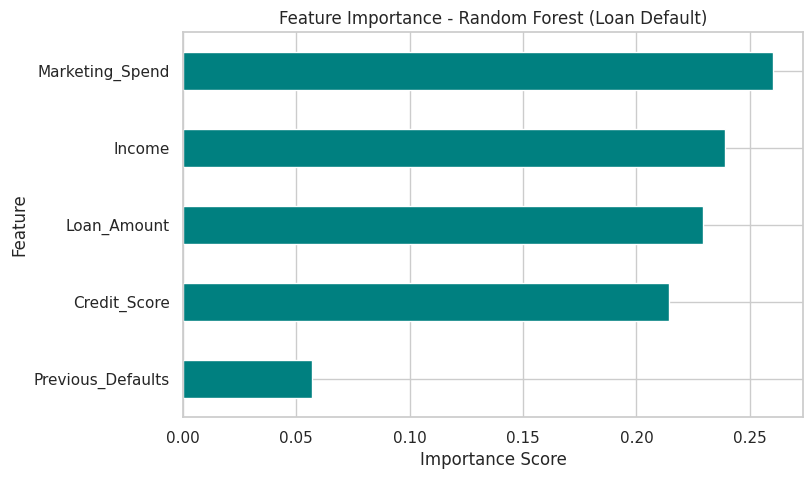

🔢 Sales MSE: 819855683.39

🧍 Customer Churn Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        71
           1       0.00      0.00      0.00        29

    accuracy                           0.71       100
   macro avg       0.35      0.50      0.42       100
weighted avg       0.50      0.71      0.59       100


💳 Loan Default Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        82
           1       1.00      0.06      0.11        18

    accuracy                           0.83       100
   macro avg       0.91      0.53      0.51       100
weighted avg       0.86      0.83      0.76       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 🎯 Load & prep features
important_features = ['Credit_Score', 'Loan_Amount', 'Previous_Defaults', 'Income', 'Marketing_Spend']
X_selected = df[important_features]
y_sales = df['Sales']
y_churn = df['Customer_Churn']
y_default = df['Defaulted']

# ⚖️ Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_df = pd.DataFrame(X_scaled, columns=important_features)

# --- LINEAR REGRESSION (Sales) ---
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_df, y_sales, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train_s, y_train_s)
y_pred_sales = reg.predict(X_test_s)
mse_sales = mean_squared_error(y_test_s, y_pred_sales)

# 📈 Plot: Predicted vs Actual Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_s, y=y_pred_sales)
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()

# --- LOGISTIC REGRESSION (Churn) ---
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_df, y_churn, test_size=0.2, random_state=42)
log_churn = LogisticRegression(max_iter=200)
log_churn.fit(X_train_c, y_train_c)
y_pred_churn = log_churn.predict(X_test_c)
cm_churn = confusion_matrix(y_test_c, y_pred_churn)

# 📈 Plot: Confusion Matrix (Churn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_churn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.title("Confusion Matrix - Customer Churn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- RANDOM FOREST (Default) ---
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_df, y_default, test_size=0.2, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_d, y_train_d)
y_pred_default = forest.predict(X_test_d)
cm_default = confusion_matrix(y_test_d, y_pred_default)

# 📈 Plot: Confusion Matrix (Defaulted)
plt.figure(figsize=(6,5))
sns.heatmap(cm_default, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Defaulted", "Defaulted"], yticklabels=["Not Defaulted", "Defaulted"])
plt.title("Confusion Matrix - Loan Default")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 Plot: Feature Importance (Defaulted)
importances = pd.Series(forest.feature_importances_, index=X_df.columns)
plt.figure(figsize=(8,5))
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance - Random Forest (Loan Default)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

# --- Summary Stats ---
print(f"🔢 Sales MSE: {mse_sales:.2f}")
print("\n🧍 Customer Churn Report:\n", classification_report(y_test_c, y_pred_churn))
print("\n💳 Loan Default Report:\n", classification_report(y_test_d, y_pred_default))


<ipython-input-8-e279b5bd051b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Predicted_Default', palette='Set2')


{'Total_Loans': 500,
 'Predicted_Defaulted': 95,
 'Predicted_Safe': 405,
 'Chart': 'sandbox:/content/predicted_loan_default_distribution.png'}

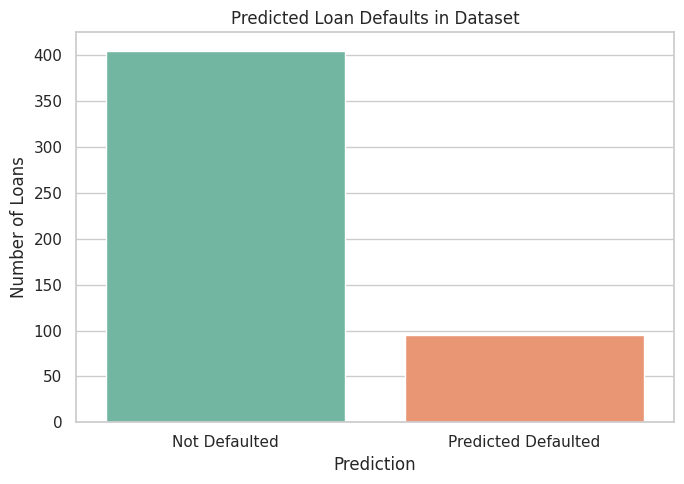

In [8]:
# Reload cleaned dataset and top 5 features
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("/content/cleaned_dataset_week_4.csv")

# Select important features and target
important_features = ['Credit_Score', 'Loan_Amount', 'Previous_Defaults', 'Income', 'Marketing_Spend']
X_flag = df[important_features]
y_flag = df['Defaulted']

# Scale features
scaler = StandardScaler()
X_flag_scaled = scaler.fit_transform(X_flag)

# Train Random Forest on full dataset
model_flag = RandomForestClassifier(n_estimators=100, random_state=42)
model_flag.fit(X_flag_scaled, y_flag)

# Predict default probabilities and classes
predicted_defaults = model_flag.predict(X_flag_scaled)
df['Predicted_Default'] = predicted_defaults

# Count predicted defaults
default_count = df['Predicted_Default'].value_counts().to_dict()
total_loans = len(df)
predicted_defaulted_loans = default_count.get(1, 0)
predicted_safe_loans = default_count.get(0, 0)

# Plot predicted default distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Predicted_Default', palette='Set2')
plt.xticks([0, 1], ['Not Defaulted', 'Predicted Defaulted'])
plt.title("Predicted Loan Defaults in Dataset")
plt.xlabel("Prediction")
plt.ylabel("Number of Loans")
plt.tight_layout()
plt.savefig("/content/predicted_loan_default_distribution.png")

{
    "Total_Loans": total_loans,
    "Predicted_Defaulted": predicted_defaulted_loans,
    "Predicted_Safe": predicted_safe_loans,
    "Chart": "sandbox:/content/predicted_loan_default_distribution.png"
}
